# Estimating Cosmological Parameters with an Artificial Neural Network

### Introduction:

**Goal:** Develop a neural network model to estimate $\Omega_{matter}$ (dark matter density parameter) and the Hubble constant ($H_0$) by analyzing the relationship between Hubble values and redshift (z).

**Data Generation:**

* **Friedmann Equation:**
  
$\
  H(z) = H_0 \cdot \sqrt{\Omega_m \cdot (1 + z)^3 + \Omega_\Lambda}
\$

* **Assumptions:**
  * Radiation density parameter ($\Omega_r$) is assumed to be 0.
  * $\Omega_\Lambda = 1 - \Omega_m$
* **Data Generation Process:**
  * Generate synthetic data for Hubble values using the Friedmann equation.
  * Add noise to the data based on residuals from observational versus theoretical values.
  * Vary Hubble constant $H_0$, $\Omega_m$ across a range of possible values to create a comprehensive dataset.





### Data Collection and Deviation Calculation <br>

To ensure our model reflects real-world conditions, we incorporate observational data from the reference 
https://doi.org/10.48550/arXiv.1711.03437

We utilize 36 observational data points from this paper, which provide a precise benchmark for our theoretical model. By calculating the deviation between the observed Hubble values and those predicted by the theoretical model (based on the Friedmann equation), we account for real-world discrepancies. These deviations are then added as noise to the generated synthetic data, improving the model's ability to handle uncertainties and making it more robust in predicting cosmological parameters.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('your_data.csv')

# Assume the dataset has columns: 'redshift' and 'hubble_value'
redshift = data['redshift'].values
H_obs = data['hubble_value'].values

# Display the first few rows of the dataset
print(data.head())


C:\Users\AK traders\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


   redshift  hubble_value
0     0.070          69.0
1     0.090          69.0
2     0.120          68.6
3     0.170          83.0
4     0.179          75.0


#### Compute the Hubble values from Friendmann Equation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Constants
H0 = 70  # Hubble constant in km/s/Mpc (example value)
Omega_m = 0.3  # Matter density parameter
Omega_r = 0.0  # Radiation density parameter (negligible in the late universe)
Omega_Lambda = 1.0 - Omega_m  # Dark energy density parameter

def H_theory(z, H0, Omega_m, Omega_r, Omega_Lambda):
    return H0 * np.sqrt(Omega_m * (1 + z)**3 + Omega_r * (1 + z)**4 + Omega_Lambda)

# Generate redshift values (z)
z_values = np.linspace(0, 2, 100)  # Redshift range from 0 to 2

# Calculate theoretical Hubble parameter
H_theory_values = H_theory(z_values, H0, Omega_m, Omega_r, Omega_Lambda)


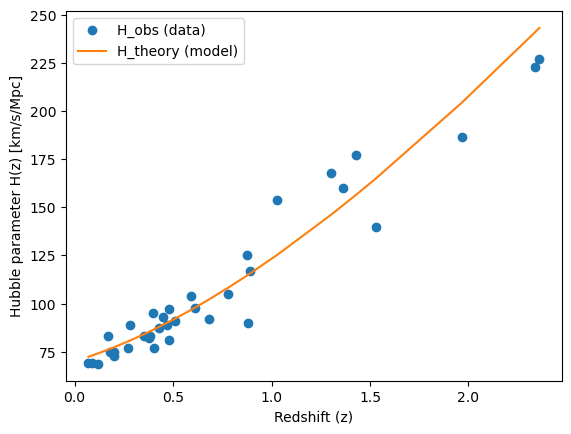

In [3]:
# Calculate the theoretical Hubble values based on the redshift from the dataset
H_theory_values = H_theory(redshift, H0, Omega_m, Omega_r, Omega_Lambda)

# Plot the results
plt.plot(redshift, H_obs, 'o', label="H_obs (data)")
plt.plot(redshift, H_theory_values, '-', label="H_theory (model)")
plt.xlabel("Redshift (z)")
plt.ylabel("Hubble parameter H(z) [km/s/Mpc]")
plt.legend()
plt.show()

#### Calculate residuals between $H_{Obs}$ and $H_{Theory}$

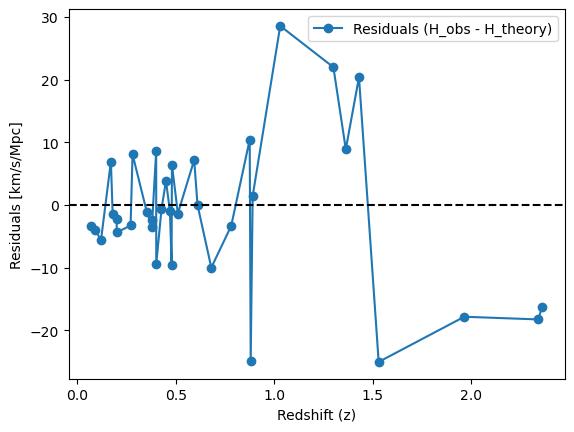

Mean residual: -1.0185591376424328, Std residual: 11.634756510214782


In [4]:
# Calculate residuals between H_obs and H_theory
residuals = H_obs - H_theory_values

# Plot residuals
plt.plot(redshift, residuals, 'o-', label="Residuals (H_obs - H_theory)")
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Redshift (z)")
plt.ylabel("Residuals [km/s/Mpc]")
plt.legend()
plt.show()

# Calculate the mean and standard deviation of the residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

print(f"Mean residual: {mean_residual}, Std residual: {std_residual}")

### Generate the Hubble Data Using Friendmann Equation.

All possible combinations of Free parameters $H_0, \Omega_m$.

In [2]:
import numpy as np

# Simulating new redshift data
z_sim = np.linspace(0, 2, 100)  

# Define ranges for parameters
H0_range = np.linspace(60, 75, num=30) # Realistic values for 𝐻0 typically fall within 60–75 km/s/Mpc, based on current observational tensions between different measurements (e.g., the CMB and distance ladder methods).  
Omega_m_range = np.linspace(0, 1, num=20) # A typical range used in cosmological modeling could span from 0.2 to 0.4 to cover various cosmological scenarios, including some deviations from the standard model.

# Ensure Omega_m + Omega_Lambda = 1
parameter_combinations = [
    (H0, Omega_m)
    for H0 in H0_range
    for Omega_m in Omega_m_range
]
print ("Set of Combination of Free Parameters of Lambda CDM : ",parameter_combinations[0:5])

Set of Combination of Free Parameters of Lambda CDM :  [(60.0, 0.0), (60.0, 0.05263157894736842), (60.0, 0.10526315789473684), (60.0, 0.15789473684210525), (60.0, 0.21052631578947367)]


In [3]:
import pandas as pd
def H_theory(z, H0, Omega_m, Omega_r):
    # Define the theoretical Hubble function here
    return H0 * np.sqrt(Omega_m * (1 + z)**3 + (1.0-Omega_m))


mean_residual = -1.0185591376424328  # actual mean residual from real data
std_residual = 11.634756510214782  # actual standard deviation of residuals

data_list = []

for H0, Omega_m in parameter_combinations:
    # Calculate theoretical Hubble values for the simulated redshift
    H_theory_sim = H_theory(z_sim, H0, Omega_m, Omega_r=0)

    # Add noise based on the average residuals from the real dataset
    H_obs_sim = H_theory_sim + np.random.normal(mean_residual, std_residual, size=len(z_sim))
    
    # Append to data list
    data_list.append(pd.DataFrame({'redshift': z_sim, 'Hz': H_obs_sim, 'Hubble_constant': H0,
                                  'Omega_m':Omega_m}))


# Combine all data
data = pd.concat(data_list, ignore_index=True)
print (data.shape)
data.head()

(60000, 4)


,redshift,Hz,Hubble_constant,Omega_m
0,0.000000,70.952803,60.0,0.0
1,0.020202,59.035107,60.0,0.0
2,0.040404,68.186772,60.0,0.0
3,0.060606,71.396196,60.0,0.0
4,0.080808,49.473775,60.0,0.0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


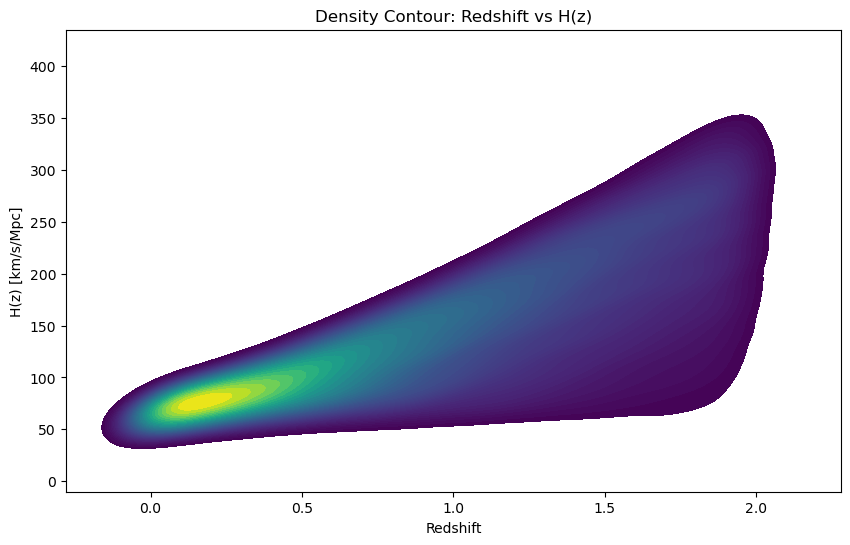

In [4]:
import seaborn as sns

plt.figure(figsize=(10, 6))

# Create a density contour plot
scatter = sns.kdeplot(x=data['redshift'], y=data['Hz'], 
                      fill=True, cmap='viridis', levels=50)


plt.xlabel('Redshift')
plt.ylabel('H(z) [km/s/Mpc]')
plt.title('Density Contour: Redshift vs H(z)')
plt.show()



### Data Preparation and Neural Network Training

#### Splitting the Data
To prepare the data for training, we first extract the features and labels:
- `X`: The input features consisting of redshift values and generated Hubble values.
- `y`: The target labels, which include the Hubble constant (($H_0$)), ($\Omega_m$) parameters.

We normalize the input features using `MinMaxScaler`, ensuring that all values are scaled between 0 and 1 to improve the convergence of the neural network. The data is then split into training and testing sets, with 20% of the data reserved for testing, using the `train_test_split` function from `sklearn`. This ensures that the model can be evaluated on unseen data.


#### Neural Network Architecture
We define a sequential neural network model using the `TensorFlow` and `Keras` libraries. The model is designed to predict the Hubble constant and ($\Omega_m$) simultaneously from the redshift and Hubble values. Key elements of the architecture include:
- Input layer: It takes the normalized feature set.
- Hidden layers: Three densely connected hidden layers with `ReLU` activation functions, followed by a `Dropout` layer to prevent overfitting by randomly turning off 20% of neurons during training.
- Output layer: The output consists of two neurons predicting the Hubble constant and \($\Omega_m\$).

The network is compiled using the Adam optimizer with a mean squared error (MSE) loss function, suitable for regression tasks.


####  Training the Neural Network

We train the model over 100 epochs using a batch size of 64. To enhance the model's performance and reduce overfitting, we use a callback (`ReduceLROnPlateau`) that reduces the learning rate by a factor of 0.5 if the validation loss plateaus. This prevents the model from getting stuck in local minima. A portion (20%) of the training data is used for validation during the training process to monitor the model’s performance.


####  Model Evaluation and Visualization

After training, the model is evaluated on the test set to determine the test loss (MSE). We also plot the training and validation loss over the epochs to observe the model's learning curve, ensuring that the model has not overfitted to the training data.


#### Predicting with Uncertainty (Monte Carlo Dropout)

To incorporate uncertainty into the predictions, we utilize Monte Carlo Dropout, where we perform multiple forward passes (100 iterations) through the model with dropout enabled. This method allows us to estimate both the mean and standard deviation of the predictions, giving insights into the uncertainty of the model's predictions.


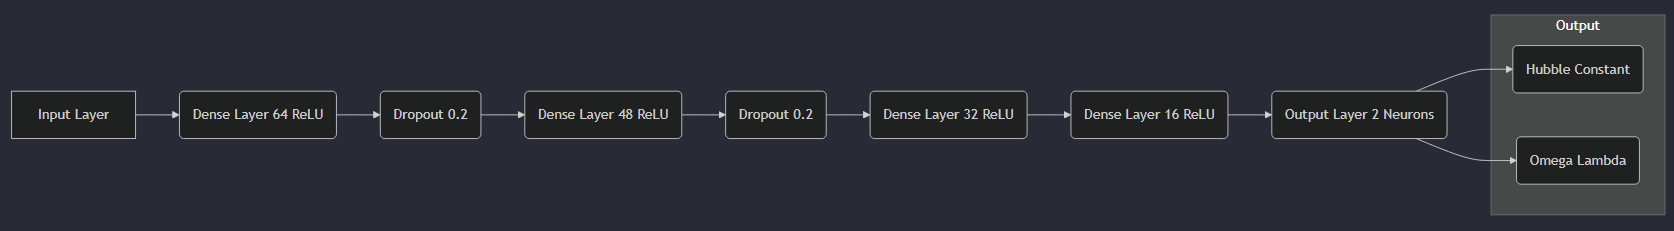

In [5]:
X = data[['redshift', 'Hz']]
y = data[['Hubble_constant', 'Omega_m']]


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalized the X-Dataset using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib qt

# Define the Monte Carlo Dropout function
def predict_with_uncertainty(f_model, X, n_iter=100):
    predictions = np.array([f_model(X, training=True) for _ in range(n_iter)])
    prediction_mean = predictions.mean(axis=0)
    prediction_std = predictions.std(axis=0)
    return prediction_mean, prediction_std

# Define the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Adding Dropout with rate 0.2
    Dense(48, activation='relu'),
    Dropout(0.2),  
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2)  # Output two values: Hubble constant and Omega_Lambda
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train[['Hubble_constant', 'Omega_m']], epochs=100, batch_size=64,
                    validation_split=0.2, 
                    callbacks=[reduce_lr])

# Plot loss per Epoch
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Testing the model
test_loss = model.evaluate(X_test, y_test[['Hubble_constant', 'Omega_m']])
print(f"Test Loss: {test_loss}")

# Predict with uncertainty (e.g., 100 forward passes)
predicted_mean, predicted_std = predict_with_uncertainty(model, X_test, n_iter=100)

# Apply inverse transform to get the original scale
predicted_mean_inverse = predicted_mean
predicted_std_inverse = predicted_std
print(predicted_mean_inverse, predicted_std_inverse)


Epoch 1/100


C:\Users\AK traders\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 941.3552 - val_loss: 9.9073 - learning_rate: 0.0010
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 32.7420 - val_loss: 16.5557 - learning_rate: 0.0010
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 25.9546 - val_loss: 13.8846 - learning_rate: 0.0010
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.9786 - val_loss: 12.0073 - learning_rate: 0.0010
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14.6454 - val_loss: 13.7726 - learning_rate: 0.0010
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.5914 - val_loss: 12.1088 - learning_rate: 0.0010
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11.2085 - val_loss: 11.4287 - learning_rate: 5.0000e-04
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.7798 - val_loss: 9.6559 - learning_rate: 5.0000e-04
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.1025 - val_loss: 9.4808 - learning_ra

Epoch 56/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.0225 - val_loss: 9.0505 - learning_rate: 7.8125e-06
Epoch 57/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.1183 - val_loss: 9.0496 - learning_rate: 7.8125e-06
Epoch 58/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.0203 - val_loss: 9.0506 - learning_rate: 7.8125e-06
Epoch 59/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.0553 - val_loss: 9.0494 - learning_rate: 7.8125e-06
Epoch 60/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.0309 - val_loss: 9.0497 - learning_rate: 7.8125e-06
Epoch 61/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.1099 - val_loss: 9.0496 - learning_rate: 3.9063e-06
Epoch 62/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.1402 - val_loss: 9.0500 - learning_rate: 3.9063e-06
Epoch 63/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.1167 - val_loss: 9.0496 - learning_rate: 3.9063e-06
Epoch 64/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.9944 - v

C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\eventloops.py:113: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  app.exec_()
C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\eventloops.py:113: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  app.exec_()


### Visualization: Predicted Hubble Values with Uncertainty Bounds

In this step, we use the trained neural network model to predict the Hubble constant and ($\Omega_m$), along with their uncertainties. We calculate the corresponding ($\Omega_\Lambda$) values from the predicted ($\Omega_m$) values and then use these predictions to compute the Hubble values across the redshift range.

#### Steps:
1. **Predicted Mean and Uncertainty**: 
   Using Monte Carlo dropout, we perform 100 forward passes to predict both the mean and standard deviation (uncertainty) for the Hubble constant and ($\Omega_m$). We then calculate ($\Omega_\Lambda$) as ($1 - \Omega_m$), since we assume a flat universe with no contribution from radiation ($(\Omega_r = 0)$).

2. **Inverse Scaling**: 
   The predicted redshift and Hubble values are inverse transformed to match the original scale before prediction.

3. **Hubble Value Calculation**: 
   Using the predicted Hubble constant and ($\Omega$) values, we calculate the Hubble values at different redshifts using the Friedmann equation. This gives the predicted mean Hubble values.

4. **Uncertainty Bounds**: 
   To visualize the uncertainty, we calculate the upper and lower bounds of the predicted Hubble values by adding and subtracting the standard deviations from the predicted mean. This provides an envelope of uncertainty around the predictions.

5. **Plotting**: 
   We plot the predicted Hubble values along with the uncertainty bounds, comparing them to the theoretical Hubble values. The plot shows the predicted mean Hubble values, shaded uncertainty bounds, and the identity line representing the theoretical values.



This visualization allows us to compare the predicted Hubble values and their associated uncertainties with the theoretical values. The shaded region represents the model's uncertainty in predicting the Hubble constant and ($\Omega_m$), providing insights into the reliability and confidence of the predictions.


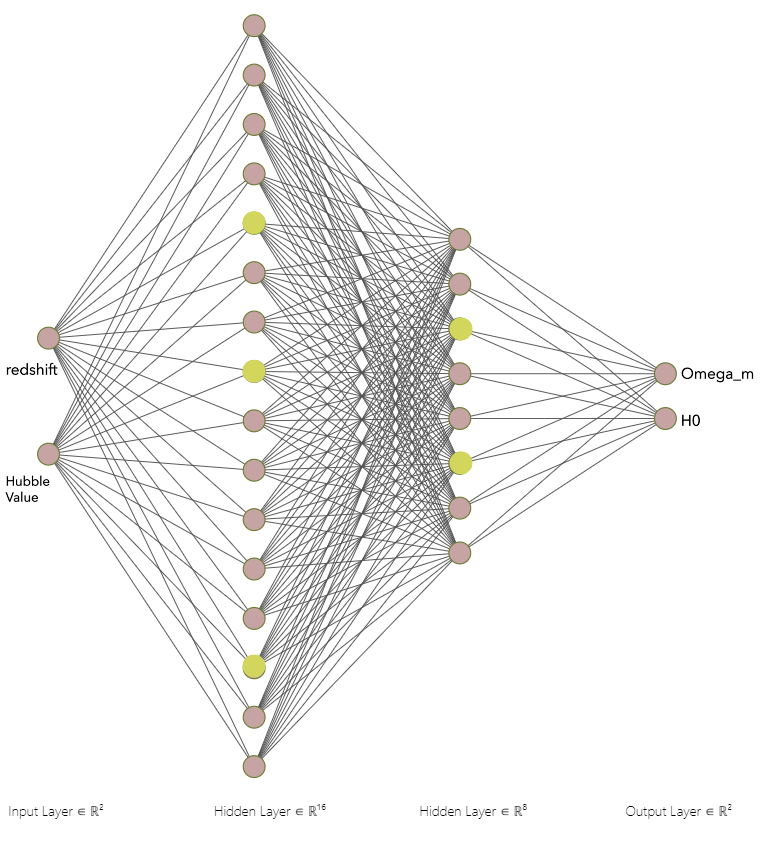

C:\Users\AK traders\AppData\Local\Temp\ipykernel_5404\234678988.py:14: RuntimeWarning: invalid value encountered in sqrt
  calculated_Hubble_mean = predicted_hubble_constant_mean * np.sqrt(predicted_omega_m_mean * (1 + X_reverse[:, 0])**3 + predicted_omega_L_mean)
C:\Users\AK traders\AppData\Local\Temp\ipykernel_5404\234678988.py:25: RuntimeWarning: invalid value encountered in sqrt
  calculated_Hubble_lower = (predicted_hubble_constant_mean - predicted_hubble_constant_std) * np.sqrt(


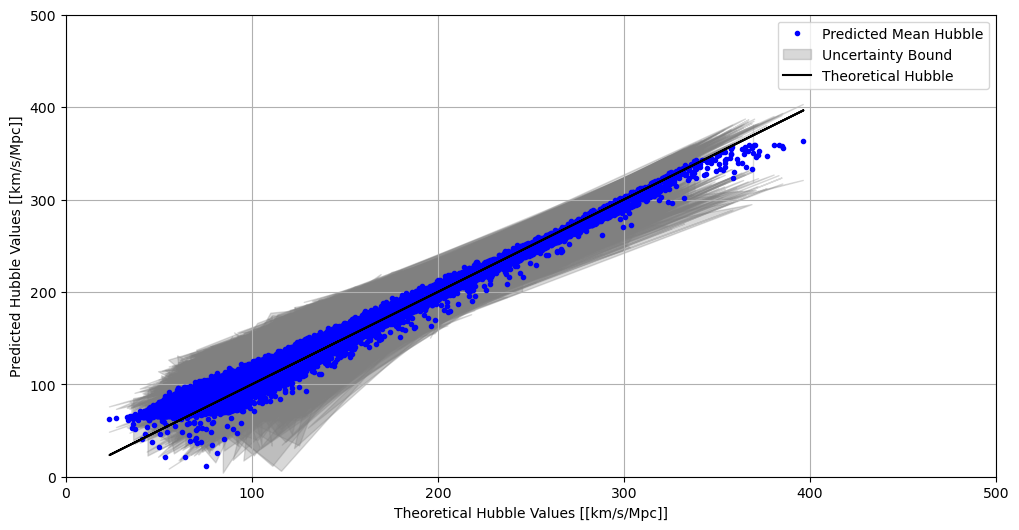

In [12]:
%matplotlib inline
# Predict with uncertainty
predicted_mean, predicted_std = predict_with_uncertainty(model, X_test, n_iter=100)

# Calculate Omega_m from predicted Omega_Lambda
predicted_hubble_constant_mean = predicted_mean[:, 0]
predicted_omega_m_mean = predicted_mean[:, 1]
predicted_omega_L_mean = 1 - predicted_omega_m_mean

# Inverse scaling for the test input (to match the original scale)
X_reverse = scaler.inverse_transform(X_test)

# Calculate H(z) from the predicted parameters
calculated_Hubble_mean = predicted_hubble_constant_mean * np.sqrt(predicted_omega_m_mean * (1 + X_reverse[:, 0])**3 + predicted_omega_L_mean)

# For the uncertainty: calculate the spread using the standard deviations
predicted_hubble_constant_std = predicted_std[:, 0]
predicted_omega_L_std = predicted_std[:, 1]
predicted_omega_m_std = predicted_omega_L_std  # Since Omega_m is 1 - Omega_Lambda, their uncertainties are the same

# Calculate the upper and lower bounds of Hubble values from uncertainty
calculated_Hubble_upper = (predicted_hubble_constant_mean + predicted_hubble_constant_std) * np.sqrt(
    (predicted_omega_m_mean + predicted_omega_m_std) * (1 + X_reverse[:, 0])**3 + (predicted_omega_L_mean + predicted_omega_L_std))

calculated_Hubble_lower = (predicted_hubble_constant_mean - predicted_hubble_constant_std) * np.sqrt(
    (predicted_omega_m_mean - predicted_omega_m_std) * (1 + X_reverse[:, 0])**3 + (predicted_omega_L_mean - predicted_omega_L_std))

# Plot predicted vs theoretical Hubble values with uncertainty bounds
plt.figure(figsize=(12, 6))
plt.plot(X_reverse[:, 1], calculated_Hubble_mean, 'b.', label='Predicted Mean Hubble')
plt.fill_between(X_reverse[:, 1], calculated_Hubble_lower, calculated_Hubble_upper, color='gray', alpha=0.3, label='Uncertainty Bound')
plt.plot(X_reverse[:, 1], X_reverse[:, 1], 'k-', label='Theoretical Hubble')  # Identity line
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.grid()
plt.xlabel('Theoretical Hubble Values [[km/s/Mpc]]')
plt.ylabel('Predicted Hubble Values [[km/s/Mpc]]')
plt.legend()
plt.show()


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Users\AK traders\AppData\Local\Temp\ipykernel_5404\3433438133.py:10: RuntimeWarning: invalid value encountered in sqrt
  calculated_Hubble = predicted_hubble_constant * np.sqrt(predicted_omega_m * (1 + X_reverse[:, 0])**3 + predicted_omega_L)


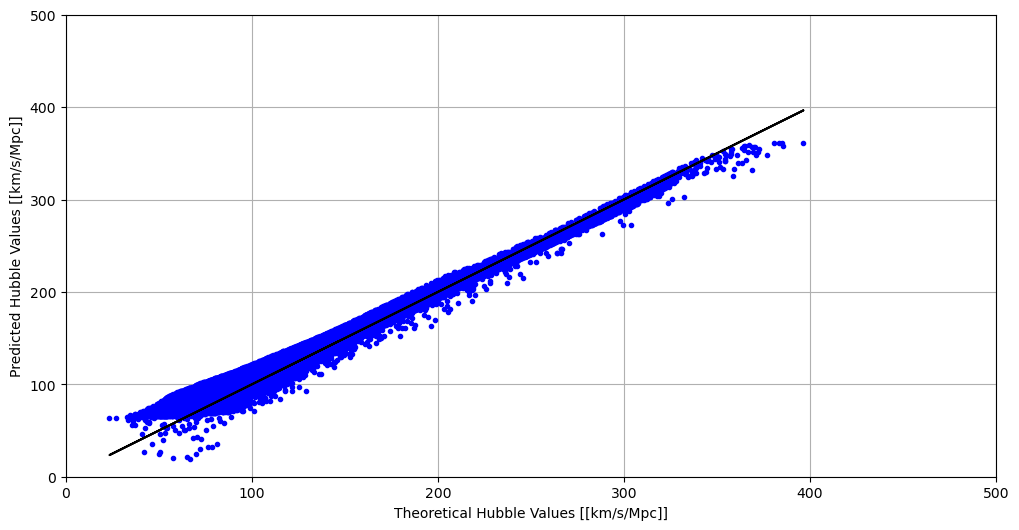

In [13]:
# Predict on new data
predicted_hubble_and_omega_m = model.predict(X_test)

# Calculate Omega_m = 1 - Omega_Lambda to enforce the constraint
predicted_hubble_constant = predicted_hubble_and_omega_m[:, 0]
predicted_omega_m = predicted_hubble_and_omega_m[:, 1]
predicted_omega_L = 1 - predicted_omega_m
X_reverse = scaler.inverse_transform(X_test)
# Calculate H(z) from predicted params: 
calculated_Hubble = predicted_hubble_constant * np.sqrt(predicted_omega_m * (1 + X_reverse[:, 0])**3 + predicted_omega_L)   
plt.figure(figsize=(12, 6))
plt.plot(X_reverse[:, 1], calculated_Hubble, 'b.')
plt.plot(X_reverse[:, 1],X_reverse[:, 1], 'k-')
plt.xlim(0,500)
plt.ylim(0,500)
plt.grid()
plt.xlabel('Theoretical Hubble Values [[km/s/Mpc]]')
plt.ylabel('Predicted Hubble Values [[km/s/Mpc]]')
plt.show()

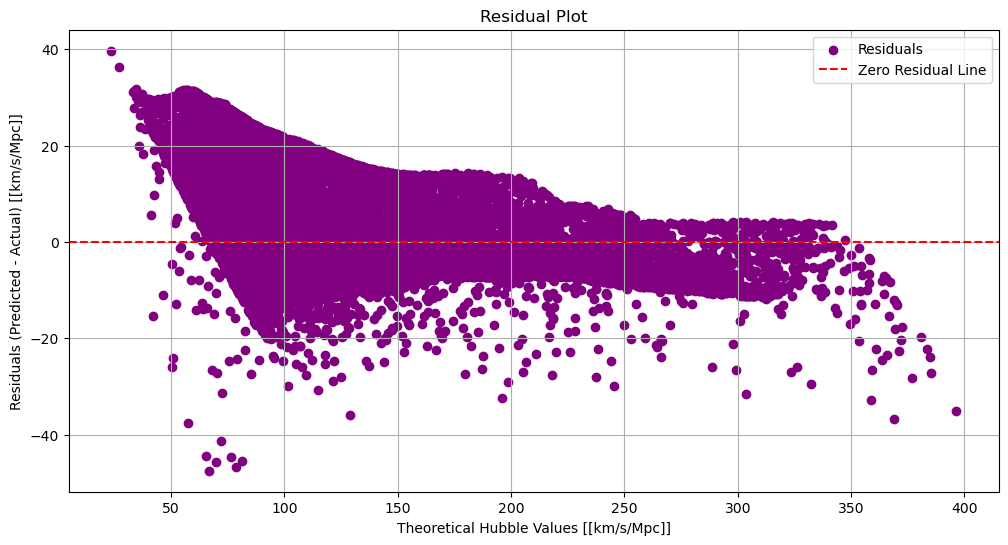

In [14]:
theoretical_Hubble = X_reverse[:, 1]
# Residual plot
residuals = calculated_Hubble - theoretical_Hubble

plt.figure(figsize=(12, 6))
plt.scatter(theoretical_Hubble, residuals, color='purple', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.grid(True)
plt.xlabel('Theoretical Hubble Values [[km/s/Mpc]]')
plt.ylabel('Residuals (Predicted - Actual) [[km/s/Mpc]]')
plt.title('Residual Plot')
plt.legend()
plt.show()


Interpretation: Residuals are randomly scattered around the zero line, it indicates that the model is making unbiased predictions. Systematic patterns in the residuals might suggest issues with the model (such as underfitting or overfitting).

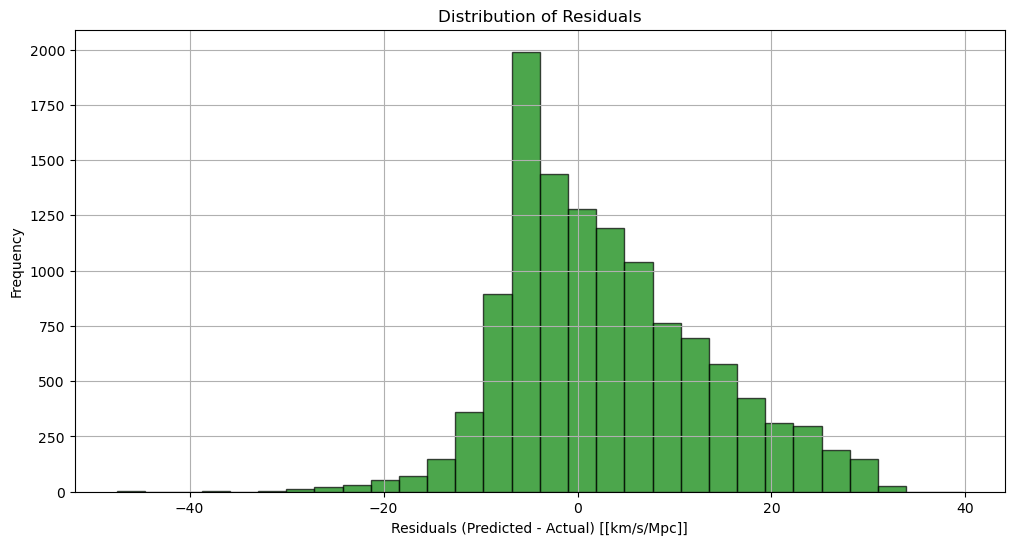

In [15]:
# Distribution of Errors (Histogram)
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.grid(True)
plt.xlabel('Residuals (Predicted - Actual) [[km/s/Mpc]]')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


Interpretation: Ideally, the residuals should be symmetrically distributed around zero. A skewed or multimodal distribution could indicate issues with the model.

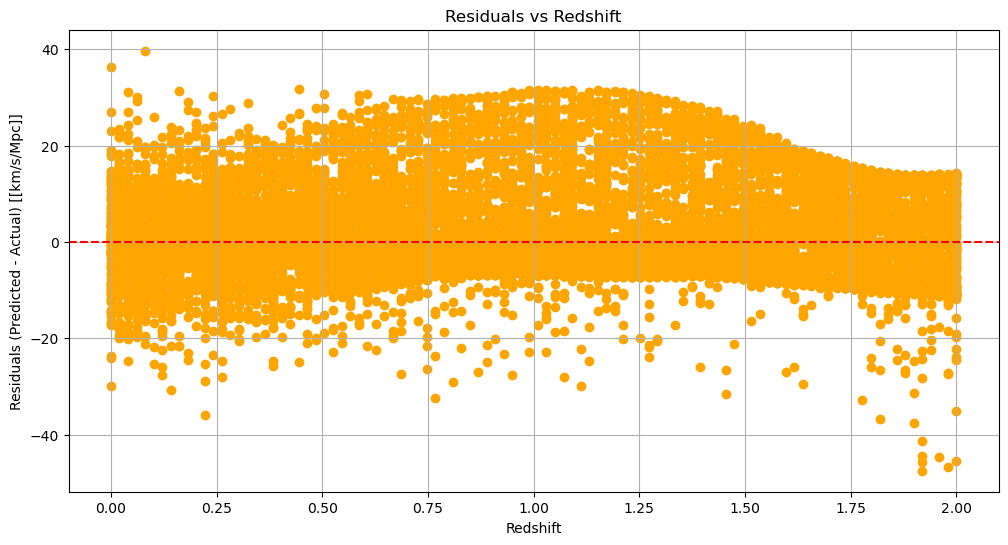

In [16]:
# Error vs Redshift

plt.figure(figsize=(12, 6))
plt.scatter(X_reverse[:, 0], residuals, color='orange')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.grid(True)
plt.xlabel('Redshift')
plt.ylabel('Residuals (Predicted - Actual) [[km/s/Mpc]]')
plt.title('Residuals vs Redshift')
plt.show()


Interpretation: If the errors are consistently large or increase with redshift, it might indicate that the model struggles with certain ranges of the data.

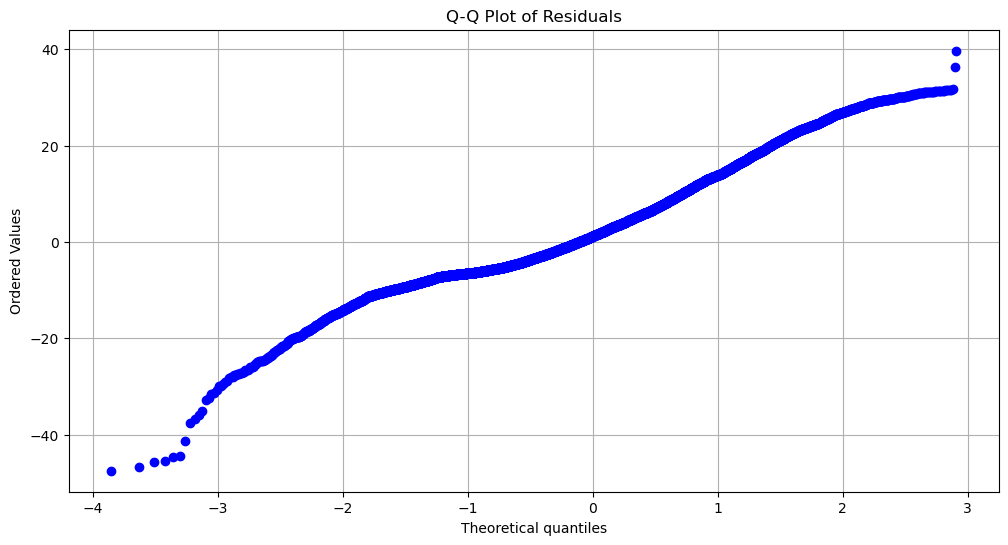

In [18]:
#Q-Q (Quantile-Quantile) Plot
import scipy.stats as stats

plt.figure(figsize=(12, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.grid(True)
plt.title('Q-Q Plot of Residuals')
plt.show()


Interpretation: If the points in the Q-Q plot fall along a straight line, it suggests that the residuals are normally distributed. Deviations from the line indicate non-normality.

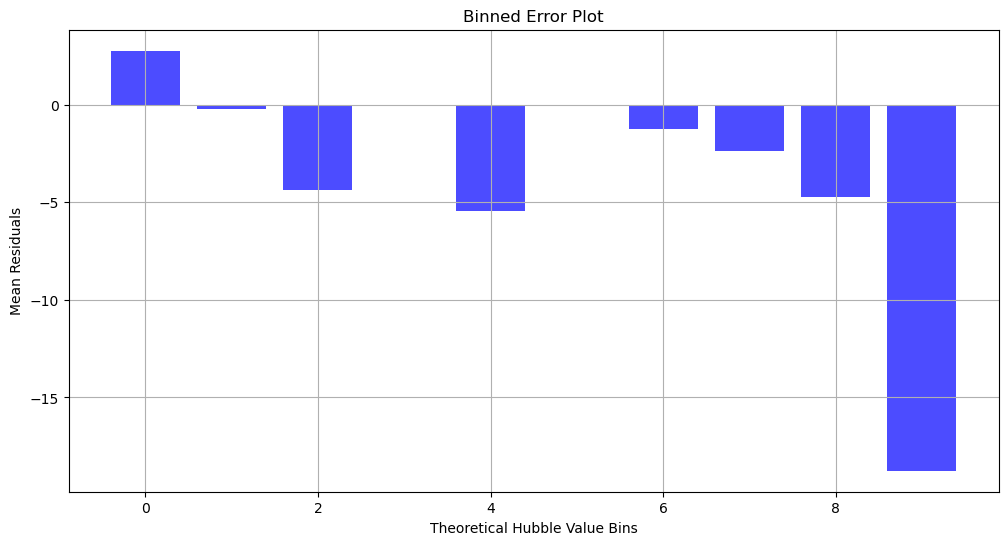

In [19]:
# Binned Error Plot

num_bins = 10
bins = pd.cut(theoretical_Hubble, bins=num_bins)
bin_means = [residuals[bins == bin].mean() for bin in bins.unique()]

plt.figure(figsize=(12, 6))
plt.bar(range(num_bins), bin_means, color='blue', alpha=0.7)
plt.grid(True)
plt.xlabel('Theoretical Hubble Value Bins')
plt.ylabel('Mean Residuals')
plt.title('Binned Error Plot')
plt.show()


Interpretation: Large positive or negative mean residuals in certain bins suggest that the model has bias in specific ranges of the data.

### Future Work

Our simple Neural Network shows the tendency to predict the Cosmological parameters to high accuracy. Nevertheless, It’s not uncommon to encounter performance issues with a neural network, especially when dealing with complex problems like cosmological parameter estimation (Hubble constant, Omega values) from redshift data. The challenge could stem from both the complexity of the problem and potential issues with the model or data. Let's break this down:

1. Problem Complexity
Cosmological Models: Estimating parameters like the Hubble constant and Omega values involves fitting complex nonlinear models. Even small changes in these parameters can lead to large differences in the predicted Hubble values due to the underlying equations (e.g., Friedmann equations).

2. Degeneracy: Some parameters may be highly correlated or degenerate. For instance, different combinations of Omega_m and Omega_Lambda could produce similar Hubble values for certain redshift ranges, making it hard for the model to distinguish between them.

3.  Advanced Techniques: Bayesian Neural Networks (BNNs)
BNNs could help by quantifying the uncertainty in predictions, which is particularly important in cosmology where error bounds on parameters are essential.
